# **Text Summarization**

<img src="https://miro.medium.com/max/423/0*ZF4ZOlUt8em024BE.png">

- **Text summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the orginal content.**

- **It is the technique for generating a concise and precise summary of columinous texts while focusing on the sections that conbey useful informatio, and without losing the overall meaning.** 

## Approaching the problem:
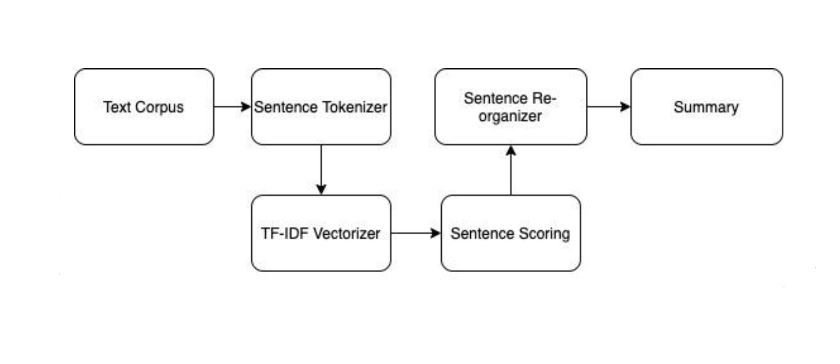

In [1]:
## Intsalling Necessary Packages
!pip install -U spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 10.0MB 3.1MB/s 
     |████████████████████████████████| 2.1MB 43.5MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.1MB 1.2MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp36-none-any.whl size=12047109 sha256=51446a72b6f4d44005b7b96398bb17c50542e11f1b5433c8a335bc7585d865f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-rix4h2_i/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


## Importing Necessary Libraries:

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en import English
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from gensim.summarization.summarizer import summarize
from textblob import TextBlob
from gensim.summarization import keywords

In [3]:
# Creating a list of Stopwords
stopwords = list(STOP_WORDS)
# Loading the Model
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe(nlp.create_pipe('sentencizer'))

## Text Corpus:

In [4]:
text_corpus = """
Google celebrated British illustrator and artist Sir John Tenniel's 
200th birth anniversary with a doodle on February 28. An acclaimed 
Victorian painter, Tenniel is celebrated for his illustrations for 
Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass.
Tenniel was born in Bayswater, West London in 1820. At the age of 20, Tenniel 
received a major eye injury and eventually, lost sight in his right eye. 
From a very early age, Tenniel was appreciated as a humorist and soon after, 
also cultured his talent for scholarly caricature.
His first illustration was for Samuel Carter Hall's The Book of British 
Ballads in 1842. Eight years later, he joined the historic weekly magazine 
Punch as a political cartoonist. Lewis Carroll noticed Tenniel's distinct style 
of work and in 1864, approached the artist to illustrate his book, Alice's 
Adventures in Wonderland. This association marked Carroll and Tenniel's creative 
partnership and continued with Through the Looking Glass in 1872. "The result: 
a series of classic characters, such as Alice and the Cheshire Cat, as depicted 
in the Doodle artwork's rendition of their iconic meeting-characters who, along 
with many others, remain beloved by readers of all ages to this day," the Google 
Doodle page says. After working with Lewis Carroll, Tenniel resumed his work with 
Punch. For his work, Tenniel also received a knighthood in 1893.
Sir John Tenniel died on February 25, 1914. He was 93.
"""

## Preprocessing:

In [5]:
# Creating spacy document for further sentence level tokenization

doc = nlp(text_corpus.replace("\n", ""))
sentences = [sent.string.strip() for sent in doc.sents]

In [6]:
# Making a list of tokens called tokens
tokens = [token.text for token in doc]
print(tokens)

['Google', 'celebrated', 'British', 'illustrator', 'and', 'artist', 'Sir', 'John', 'Tenniel', "'s", '200th', 'birth', 'anniversary', 'with', 'a', 'doodle', 'on', 'February', '28', '.', 'An', 'acclaimed', 'Victorian', 'painter', ',', 'Tenniel', 'is', 'celebrated', 'for', 'his', 'illustrations', 'for', 'Lewis', 'Carroll', "'s", 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'and', 'Through', 'the', 'Looking', '-', 'Glass', '.', 'Tenniel', 'was', 'born', 'in', 'Bayswater', ',', 'West', 'London', 'in', '1820', '.', 'At', 'the', 'age', 'of', '20', ',', 'Tenniel', 'received', 'a', 'major', 'eye', 'injury', 'and', 'eventually', ',', 'lost', 'sight', 'in', 'his', 'right', 'eye', '.', 'From', 'a', 'very', 'early', 'age', ',', 'Tenniel', 'was', 'appreciated', 'as', 'a', 'humorist', 'and', 'soon', 'after', ',', 'also', 'cultured', 'his', 'talent', 'for', 'scholarly', 'caricature', '.', 'His', 'first', 'illustration', 'was', 'for', 'Samuel', 'Carter', 'Hall', "'s", 'The', 'Book', 'of', 'British'

In [7]:
# Peeking into our tokenized sentences
print("Senetence are: \n", sentences)

Senetence are: 
 ["Google celebrated British illustrator and artist Sir John Tenniel's 200th birth anniversary with a doodle on February 28.", "An acclaimed Victorian painter, Tenniel is celebrated for his illustrations for Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass.", 'Tenniel was born in Bayswater, West London in 1820.', 'At the age of 20, Tenniel received a major eye injury and eventually, lost sight in his right eye.', 'From a very early age, Tenniel was appreciated as a humorist and soon after, also cultured his talent for scholarly caricature.', "His first illustration was for Samuel Carter Hall's The Book of British Ballads in 1842.", 'Eight years later, he joined the historic weekly magazine Punch as a political cartoonist.', "Lewis Carroll noticed Tenniel's distinct style of work and in 1864, approached the artist to illustrate his book, Alice's Adventures in Wonderland.", "This association marked Carroll and Tenniel's creative partnership a

In [8]:
# Creating sentence organizer which will store the sentence ordering to later reorganize the 
# scored sentences in their correct order
sentence_organizer = {k:v for v,k in enumerate(sentences)}

In [9]:
print("Our sentence organizer: \n", sentence_organizer)


Our sentence organizer: 
 {"Google celebrated British illustrator and artist Sir John Tenniel's 200th birth anniversary with a doodle on February 28.": 0, "An acclaimed Victorian painter, Tenniel is celebrated for his illustrations for Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass.": 1, 'Tenniel was born in Bayswater, West London in 1820.': 2, 'At the age of 20, Tenniel received a major eye injury and eventually, lost sight in his right eye.': 3, 'From a very early age, Tenniel was appreciated as a humorist and soon after, also cultured his talent for scholarly caricature.': 4, "His first illustration was for Samuel Carter Hall's The Book of British Ballads in 1842.": 5, 'Eight years later, he joined the historic weekly magazine Punch as a political cartoonist.': 6, "Lewis Carroll noticed Tenniel's distinct style of work and in 1864, approached the artist to illustrate his book, Alice's Adventures in Wonderland.": 7, "This association marked Carroll and

## Building the Model:

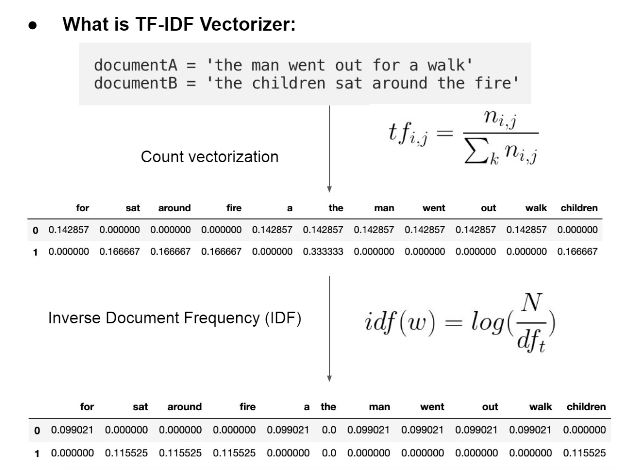

In [10]:
# Creating a tf-idf (Term frequnecy Inverse Document Frequency) model
tf_idf_vectorizer = TfidfVectorizer(min_df=2,  max_features=None, 
                                    strip_accents='unicode', 
                                    analyzer='word',
                                    token_pattern=r'\w{1,}',
                                    ngram_range=(1, 3), 
                                    use_idf=1,smooth_idf=1,
                                    sublinear_tf=1,
                                    stop_words = 'english')
tf_idf_vectorizer.fit(sentences)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=2, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=1, stop_words='english', strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [11]:
# word frequency table
"""
It will contain the number of occurrences of all the distinct words in the text 
which are not punctuations or stop words. We will create a dictionary named word_frequencies
""" 
word_frequencies = {}
for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1
                
print(word_frequencies)

{'Google': 2, 'celebrated': 2, 'British': 2, 'illustrator': 1, 'artist': 2, 'Sir': 1, 'John': 2, 'Tenniel': 10, '200th': 1, 'birth': 1, 'anniversary': 1, 'doodle': 1, 'February': 2, '28': 1, 'acclaimed': 1, 'Victorian': 1, 'painter': 1, 'illustrations': 1, 'Lewis': 3, 'Carroll': 4, 'Alice': 3, 'Adventures': 2, 'Wonderland': 2, 'Looking': 2, 'Glass': 2, 'born': 1, 'Bayswater': 1, 'West': 1, 'London': 1, '1820': 1, 'age': 2, '20': 1, 'received': 2, 'major': 1, 'eye': 2, 'injury': 1, 'eventually': 1, 'lost': 1, 'sight': 1, 'right': 1, 'early': 1, 'appreciated': 1, 'humorist': 1, 'soon': 1, 'cultured': 1, 'talent': 1, 'scholarly': 1, 'caricature': 1, 'illustration': 1, 'Samuel': 1, 'Carter': 1, 'Hall': 1, 'Book': 1, 'Ballads': 1, '1842': 1, 'years': 1, 'later': 1, 'joined': 1, 'historic': 1, 'weekly': 1, 'magazine': 1, 'Punch': 2, 'political': 1, 'cartoonist': 1, 'noticed': 1, 'distinct': 1, 'style': 1, 'work': 3, '1864': 1, 'approached': 1, 'illustrate': 1, 'book': 1, 'association': 1, 'm

In [12]:
# Getting Max frequency
max_frequency = max(word_frequencies.values())
max_frequency

10

In [13]:
"""
Dividing each frequency value in word_frequencies with the max_frequency to normalize the frequencies
"""
for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency

print(word_frequencies)

{'Google': 0.2, 'celebrated': 0.2, 'British': 0.2, 'illustrator': 0.1, 'artist': 0.2, 'Sir': 0.1, 'John': 0.2, 'Tenniel': 1.0, '200th': 0.1, 'birth': 0.1, 'anniversary': 0.1, 'doodle': 0.1, 'February': 0.2, '28': 0.1, 'acclaimed': 0.1, 'Victorian': 0.1, 'painter': 0.1, 'illustrations': 0.1, 'Lewis': 0.3, 'Carroll': 0.4, 'Alice': 0.3, 'Adventures': 0.2, 'Wonderland': 0.2, 'Looking': 0.2, 'Glass': 0.2, 'born': 0.1, 'Bayswater': 0.1, 'West': 0.1, 'London': 0.1, '1820': 0.1, 'age': 0.2, '20': 0.1, 'received': 0.2, 'major': 0.1, 'eye': 0.2, 'injury': 0.1, 'eventually': 0.1, 'lost': 0.1, 'sight': 0.1, 'right': 0.1, 'early': 0.1, 'appreciated': 0.1, 'humorist': 0.1, 'soon': 0.1, 'cultured': 0.1, 'talent': 0.1, 'scholarly': 0.1, 'caricature': 0.1, 'illustration': 0.1, 'Samuel': 0.1, 'Carter': 0.1, 'Hall': 0.1, 'Book': 0.1, 'Ballads': 0.1, '1842': 0.1, 'years': 0.1, 'later': 0.1, 'joined': 0.1, 'historic': 0.1, 'weekly': 0.1, 'magazine': 0.1, 'Punch': 0.2, 'political': 0.1, 'cartoonist': 0.1, '

In [14]:
#sentence tokenization
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[Google celebrated British illustrator and artist Sir John Tenniel's 200th birth anniversary with a doodle on February 28., An acclaimed Victorian painter, Tenniel is celebrated for his illustrations for Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass., Tenniel was born in Bayswater, West London in 1820., At the age of 20, Tenniel received a major eye injury and eventually, lost sight in his right eye., From a very early age, Tenniel was appreciated as a humorist and soon after, also cultured his talent for scholarly caricature., His first illustration was for Samuel Carter Hall's The Book of British Ballads in 1842., Eight years later, he joined the historic weekly magazine Punch as a political cartoonist., Lewis Carroll noticed Tenniel's distinct style of work and in 1864, approached the artist to illustrate his book, Alice's Adventures in Wonderland., This association marked Carroll and Tenniel's creative partnership and continued with Through the Look

In [15]:
# Calculating sentence_scores
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]
                
sentence_scores

{Google celebrated British illustrator and artist Sir John Tenniel's 200th birth anniversary with a doodle on February 28.: 0.9999999999999999,
 An acclaimed Victorian painter, Tenniel is celebrated for his illustrations for Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass.: 0.5,
 Tenniel was born in Bayswater, West London in 1820.: 0.2,
 At the age of 20, Tenniel received a major eye injury and eventually, lost sight in his right eye.: 1.5000000000000002,
 From a very early age, Tenniel was appreciated as a humorist and soon after, also cultured his talent for scholarly caricature.: 0.9999999999999999,
 His first illustration was for Samuel Carter Hall's The Book of British Ballads in 1842.: 0.30000000000000004,
 Eight years later, he joined the historic weekly magazine Punch as a political cartoonist.: 0.7999999999999999,
 Lewis Carroll noticed Tenniel's distinct style of work and in 1864, approached the artist to illustrate his book, Alice's Adventures 

In [16]:
# Transforming our sentences to TF-IDF vectors
sentence_vectors = tf_idf_vectorizer.transform(sentences)

In [17]:
# Getting sentence scores for each sentences
sentence_scores = np.array(sentence_vectors.sum(axis=1)).ravel()

# Sanity checkup
print(len(sentences) == len(sentence_scores))

True


In [18]:
# Getting top-n sentences
N = 3
top_n_sentences = [sentences[ind] for ind in np.argsort(sentence_scores, axis=0)[::-1][:N]]

In [19]:
# Selecting 30% of the sentences having the largest scores.
from heapq import nlargest
select_length = int(len(sentence_tokens)*0.3)
select_length

4

## Performing Final Summarization:

In [20]:
mapped_top_n_sentences = [(sentence,sentence_organizer[sentence]) for sentence in top_n_sentences]
print("Our top_n_sentence with their index: \n")
for element in mapped_top_n_sentences:
    print(element)

# Ordering our top-n sentences in their original ordering
mapped_top_n_sentences = sorted(mapped_top_n_sentences, key = lambda x: x[1])
ordered_scored_sentences = [element[0] for element in mapped_top_n_sentences]

# Our final summary
summary = " ".join(ordered_scored_sentences)

Our top_n_sentence with their index: 

("An acclaimed Victorian painter, Tenniel is celebrated for his illustrations for Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass.", 1)
("Lewis Carroll noticed Tenniel's distinct style of work and in 1864, approached the artist to illustrate his book, Alice's Adventures in Wonderland.", 7)
("Google celebrated British illustrator and artist Sir John Tenniel's 200th birth anniversary with a doodle on February 28.", 0)


## Result:

In [21]:
print("Summary: \n", summary)

Summary: 
 Google celebrated British illustrator and artist Sir John Tenniel's 200th birth anniversary with a doodle on February 28. An acclaimed Victorian painter, Tenniel is celebrated for his illustrations for Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass. Lewis Carroll noticed Tenniel's distinct style of work and in 1864, approached the artist to illustrate his book, Alice's Adventures in Wonderland.


In [22]:
# Splitting the summary
print(summarize(text_corpus, split=True, ratio=0.5))

["Google celebrated British illustrator and artist Sir John Tenniel's ", 'Victorian painter, Tenniel is celebrated for his illustrations for ', "Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass.", 'At the age of 20, Tenniel ', 'From a very early age, Tenniel was appreciated as a humorist and soon after, ', 'Punch as a political cartoonist.', "Lewis Carroll noticed Tenniel's distinct style ", "of work and in 1864, approached the artist to illustrate his book, Alice's ", "This association marked Carroll and Tenniel's creative ", "in the Doodle artwork's rendition of their iconic meeting-characters who, along ", 'After working with Lewis Carroll, Tenniel resumed his work with ', 'Punch.', 'For his work, Tenniel also received a knighthood in 1893.', 'Sir John Tenniel died on February 25, 1914.']


## Comparison:

#### **Sample Input**
Google celebrated British illustrator and artist Sir John Tenniel's 
200th birth anniversary with a doodle on February 28. An acclaimed 
Victorian painter, Tenniel is celebrated for his illustrations for 
Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass.
Tenniel was born in Bayswater, West London in 1820. At the age of 20, Tenniel 
received a major eye injury and eventually, lost sight in his right eye. 
From a very early age, Tenniel was appreciated as a humorist and soon after, 
also cultured his talent for scholarly caricature.
His first illustration was for Samuel Carter Hall's The Book of British 
Ballads in 1842. Eight years later, he joined the historic weekly magazine 
Punch as a political cartoonist. Lewis Carroll noticed Tenniel's distinct style 
of work and in 1864, approached the artist to illustrate his book, Alice's 
Adventures in Wonderland. This association marked Carroll and Tenniel's creative 
partnership and continued with Through the Looking Glass in 1872. "The result: 
a series of classic characters, such as Alice and the Cheshire Cat, as depicted 
in the Doodle artwork's rendition of their iconic meeting-characters who, along 
with many others, remain beloved by readers of all ages to this day," the Google 
Doodle page says. After working with Lewis Carroll, Tenniel resumed his work with 
Punch. For his work, Tenniel also received a knighthood in 1893.
Sir John Tenniel died on February 25, 1914. He was 93

```
len(text_corpus)

>>> 1483
```

#### **Sample Output:**
Google celebrated British illustrator and artist Sir John Tenniel's 200th birth anniversary with a doodle on February 28. An acclaimed Victorian painter, Tenniel is celebrated for his illustrations for Lewis Carroll's Alice's Adventures in Wonderland and Through the Looking-Glass. Lewis Carroll noticed Tenniel's distinct style of work and in 1864, approached the artist to illustrate his book, Alice's Adventures in Wonderland.

```
len(summary)

>>> 429
```

## Creating a function template using above steps:

In [23]:
def summarizer(text, tokenizer, max_sent_in_summary=3):
    # Create spacy document for further sentence level tokenization
    doc = nlp(text_corpus.replace("\n", ""))
    sentences = [sent.string.strip() for sent in doc.sents]
    # Let's create an organizer which will store the sentence ordering to later reorganize the 
    # scored sentences in their correct order
    sentence_organizer = {k:v for v,k in enumerate(sentences)}
    # Let's now create a tf-idf (Term frequnecy Inverse Document Frequency) model
    tf_idf_vectorizer = TfidfVectorizer(min_df=2,  max_features=None, 
                                        strip_accents='unicode', 
                                        analyzer='word',
                                        token_pattern=r'\w{1,}',
                                        ngram_range=(1, 3), 
                                        use_idf=1,smooth_idf=1,
                                        sublinear_tf=1,
                                        stop_words = 'english')
    # Passing our sentences treating each as one document to TF-IDF vectorizer
    tf_idf_vectorizer.fit(sentences)
    # Transforming our sentences to TF-IDF vectors
    sentence_vectors = tf_idf_vectorizer.transform(sentences)
    # Getting sentence scores for each sentences
    sentence_scores = np.array(sentence_vectors.sum(axis=1)).ravel()
    # Getting top-n sentences
    N = max_sent_in_summary
    top_n_sentences = [sentences[ind] for ind in np.argsort(sentence_scores, axis=0)[::-1][:N]]
    # Sentence ordering using our prebaked sentence_organizer
    # Mapping the scored sentences with their indexes
    mapped_top_n_sentences = [(sentence,sentence_organizer[sentence]) for sentence in top_n_sentences]
    # Ordering our top-n sentences in their original ordering
    mapped_top_n_sentences = sorted(mapped_top_n_sentences, key = lambda x: x[1])
    ordered_scored_sentences = [element[0] for element in mapped_top_n_sentences]
    # Our final summary
    summary = " ".join(ordered_scored_sentences)
    return summary

# Applying Text Analysis:

In [24]:
edu = TextBlob(summary)
x = edu.sentiment.polarity
if x<0:
  print("Negative")
elif x==0:
  print("Neutral")
elif x>0 and x<=1:
  print("Positive")

Positive
